## Цель проекта

Выявить определяющие успешность игры закономерности что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данных

Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)  

Описание данных по рейтингу:

E = («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.  
M = («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.  
Т = («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.  
E10+ = («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.  
EC= («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.  
RP =(«Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу:  

unrated - данные по рейтингу отсутствуют.  

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [36]:
df = pd.read_csv('/datasets/games.csv')

In [37]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [39]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

# Подготовка данных

## Приведем названия столбцов к нижнему регистру

In [40]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Переведем столбец year_of_releas в целочисленный формат и удалим значения с годом = 0 . Строк 269 и существенного влияния это не может оказать.

In [41]:
df['year_of_release']= df['year_of_release'].fillna(0)

In [42]:
## Переведем столбец в целочисленный формат
df['year_of_release'] = df['year_of_release'].astype('int')

In [43]:
## удалим значения с 0
df = df.query('year_of_release != 0')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [44]:
# проверка
df[df['year_of_release'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Удалим строки без названия игр так как они не несут никакой информации и не оказывают влияние на общую выборку.

In [45]:
df.dropna(subset = ['name'], inplace=True)

In [46]:
#проверим данные
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [47]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Так как оценки разных игр между собой не связаны, мы оставим пропуски в столбцах critic_score, user_score, rating

Причинами пропусков могли стать некачественно взятые исходные данные. Желательно подбирать данные изначально по определенному перечню параметров.

## Разбор аббривиатуры tbd

Аббервиатура "tbd" расщифровывается как "to be defined" и означает, что игра еще не оценена достаточным количеством пользователей

In [49]:
display(df[df['user_score']=='tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Заменим значение аббривиатуры на NaN чтобы перевести данные в формат float

In [50]:
#Заменим tbd на NaN
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NaN

In [51]:
#Переведем столбец к формату float
df['user_score'] = df['user_score'].astype('float')

In [52]:
#проверка
display(df[df['user_score']=='tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Преобразования произведены успешно

## Посчет суммарных продаж во всех регионах

In [54]:
# Добавим столбец с суммой продаж по каждой игре

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [55]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [56]:
#проверим резульат

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


# Проведите исследовательский анализ данных

## Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Ознакомимся подробнее с данными об играх в разбивке по годам

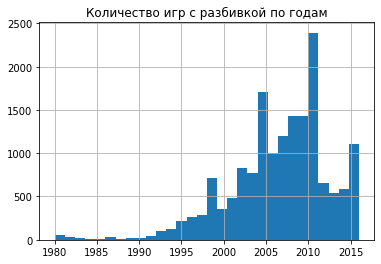

In [58]:
fig, ax = plt.subplots(1, 1)
  
ax.set_title("Количество игр с разбивкой по годам")

df['year_of_release'].hist(bins=30, range=(1980,2016))
plt.show()


In [59]:
## Представим сводную таблицу к графику "Количество игр с разбивкой по годам"
df.pivot_table(index=['year_of_release'],values='name',aggfunc=['count'])

,count
,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


Вывод: В датафрейме представленны данные с 1980 по 2016 год. Большая часть игр относится к периоду с 2008 по 2011 годы. Будем основываться в дальнейших расчетах на данных позже 2008 года.

In [60]:
#Сохраним необходимый срез в новую переменную для дальнейшей работы
data_correct = df.query('year_of_release > 2007 & year_of_release < 2016').reset_index(drop=True)
data_correct.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
2,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
3,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
4,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80


In [61]:
#проверим корректность в переменной с актуальными данными
data_correct['year_of_release'].unique()

array([2008, 2009, 2010, 2013, 2011, 2015, 2012, 2014])

## Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.

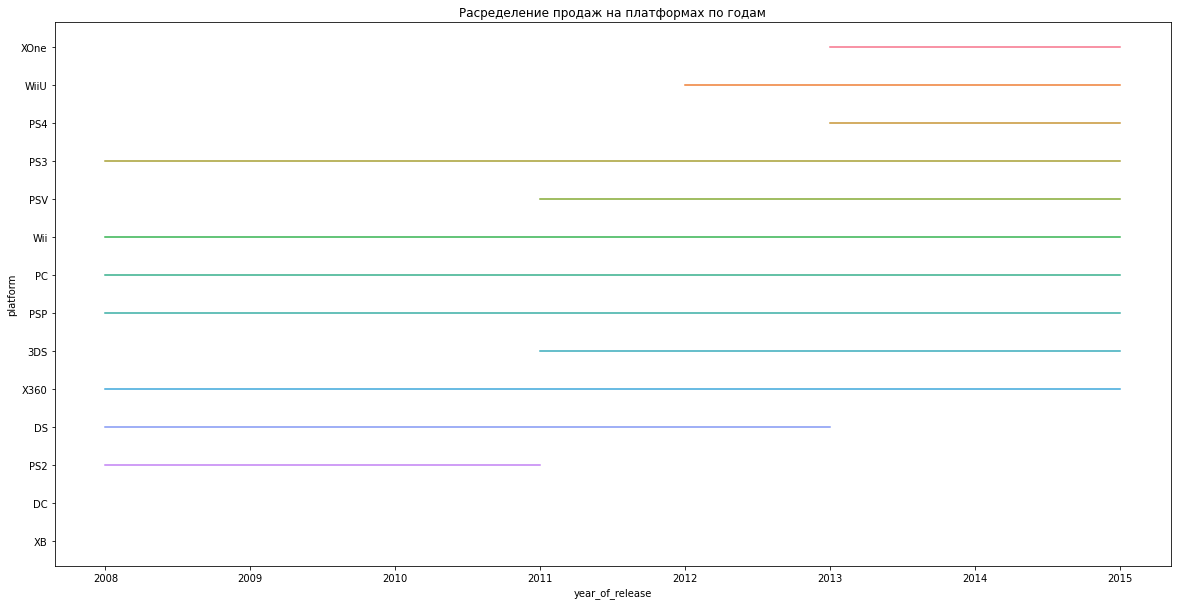

In [62]:
#построим график расределения продаж на платформах по годам:

fig,ax=plt.subplots(figsize=(20,10))
ax=sns.lineplot(
    data =(data_correct
             .pivot_table(index=['platform','year_of_release'],values='total_sales',aggfunc=['sum'])
             .sort_values('year_of_release',ascending=False)),
            y='platform',
            x='year_of_release',
            hue='platform',
            legend=False).set(title='Расределение продаж на платформах по годам')

Судя по графику можно сделать вывод, что актуальные платформы появляются через каждые 3-5 лет
Cтарые платформы исчезают через 7 лет.

## Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Сделаем сводную таблицу по общему числу продаж по платформам

In [63]:
(data_correct
             .pivot_table(index=['platform'], values='total_sales',aggfunc='sum')
            .sort_values('total_sales',ascending=False))

,total_sales
platform,
PS3,833.59
X360,804.44
Wii,601.08
DS,388.60
PS4,244.89
3DS,242.67
PC,146.04
PSP,136.38
XOne,133.17


Судя по таблице в топ3 по объему продажам входят PS3,Wii,X360, остальные существенно отстают.  
Отобразим динамику продаж по годам на графике:

<AxesSubplot:title={'center':'Динамика продаж по годам'}, xlabel='year_of_release'>

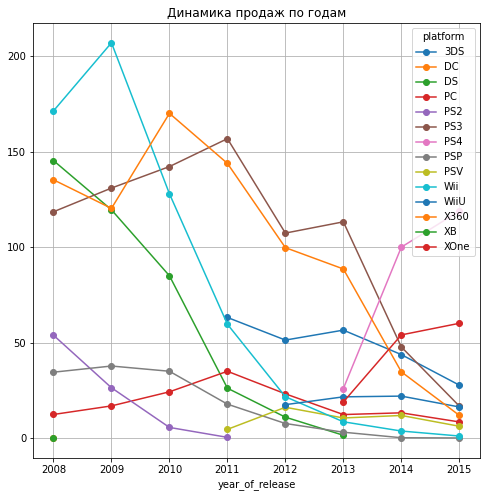

In [64]:
(data_correct.pivot_table(index='year_of_release',columns = 'platform', values='total_sales',aggfunc='sum')
.plot(grid=True, style='o-',title='Динамика продаж по годам', figsize=(8, 8)))

Согласно графику мы наблюдаем общий спад продаж после 2011 года. Так как данные за 2016 год неполные, мы не можем их учитывать. Самой перспективной платформой выглядит PS4 так как с момента старта продаж наблюдается стабильная ежегодная положительная динамика роста продаж игр.

## Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.


##### Возьмем топ 5 платформ

In [65]:
top5=data_correct.query('platform in ("PS3","PS4","Wii","X360","DS")').reset_index(drop= True)
top5.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
2,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
3,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
4,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80


<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

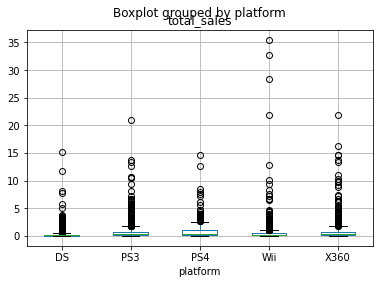

In [66]:
top5.boxplot('total_sales', by='platform')

В таком виде график неинформативен поэтому уберем масштабируем его

[(0.0, 1.8)]

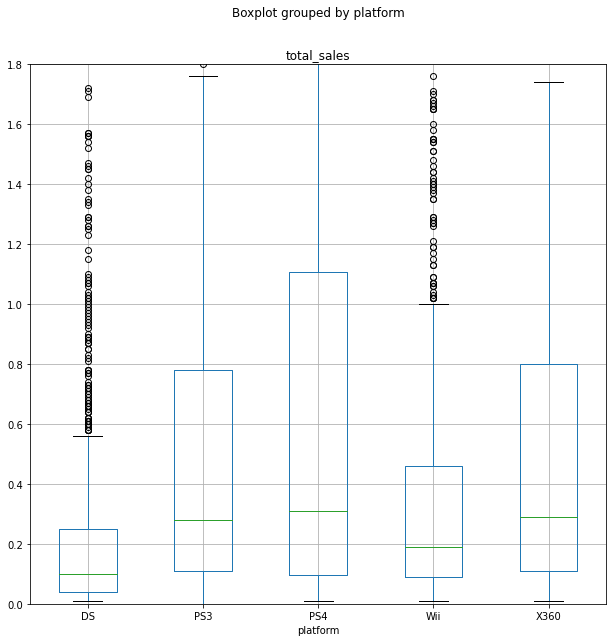

In [67]:
top5.boxplot('total_sales', by='platform',figsize=(10,10)).set(ylim=(0,1.8))

In [68]:
top5.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
DS,1402.0,0.277175,0.743390,0.01,0.0400,0.10,0.250,15.13
PS3,1151.0,0.724231,1.446816,0.00,0.1100,0.28,0.780,21.05
PS4,228.0,1.074079,1.899788,0.01,0.0975,0.31,1.105,14.63
Wii,1056.0,0.569205,2.050660,0.01,0.0900,0.19,0.460,35.52
X360,985.0,0.816690,1.711734,0.01,0.1100,0.29,0.800,21.82


По графику видно, что большая часть нормальных значений находится в диапазоне 0.6-0.8, что говорит о том, что игры в основном продаются от 600 до 800 тыс копий. 

## Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Построим диаграмму рассеяния

In [103]:
?? sns.scatterplot

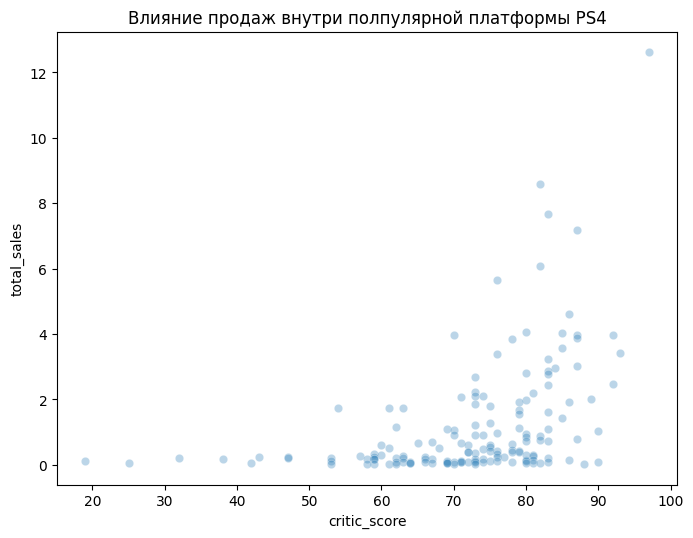

In [105]:
plt.figure(figsize=(8, 6), dpi=100)
sns.scatterplot(data=top5[top5['platform']=='PS4'],x='critic_score',y='total_sales', alpha=0.3).set(title='Влияние продаж внутри полпулярной платформы PS4')

plt.show()

посчитайте корреляцию между отзывами и продажами

In [70]:
top5.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
2,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
3,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
4,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80


In [71]:
data_top5_ps4 = top5[top5['platform']=='PS4'].pivot_table(index='total_sales',values=['critic_score']).reset_index(drop=True)
#[top5['platform']=='PS4'],x='critic_score',y='total_sales', alpha=0.3
#data_top5
data_top5_ps4.corr()

,critic_score
critic_score,1.0


Вывод: наблюдается прямая зависимость продаж от оценок критиков

## Соотнесите выводы с продажами игр на других платформах.

сделаем то же самое только с остальными платформами из актуального периода.

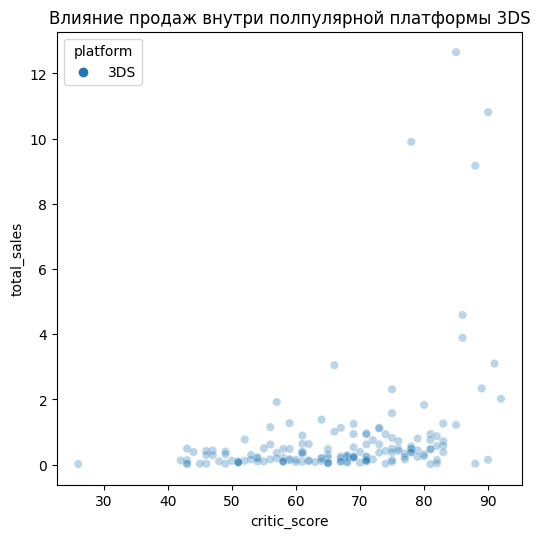

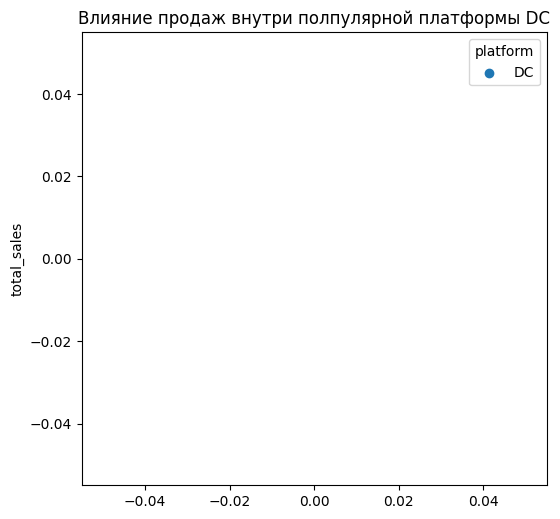

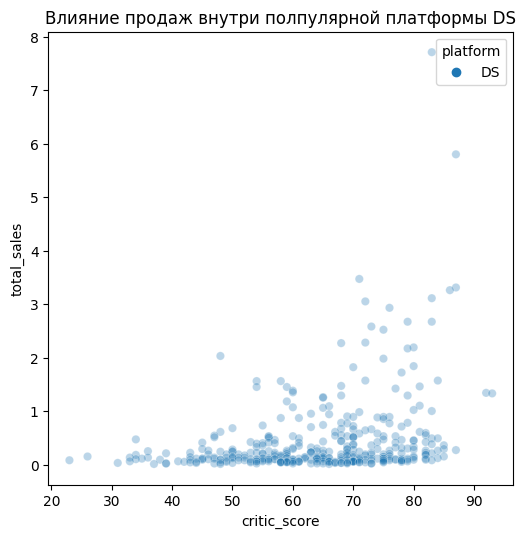

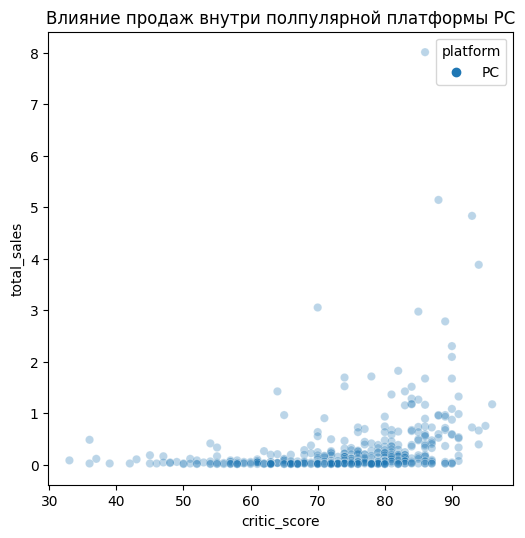

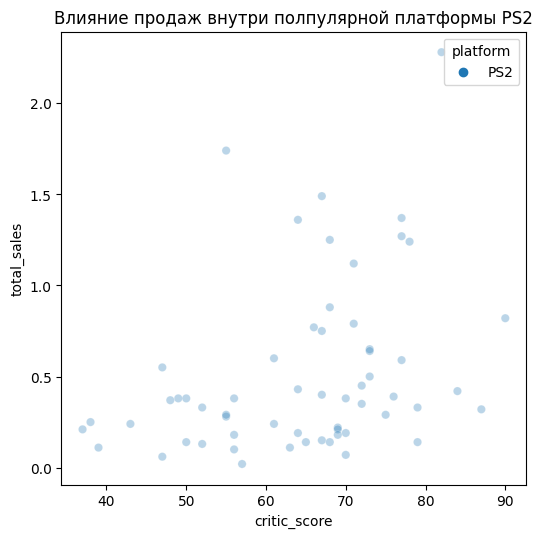

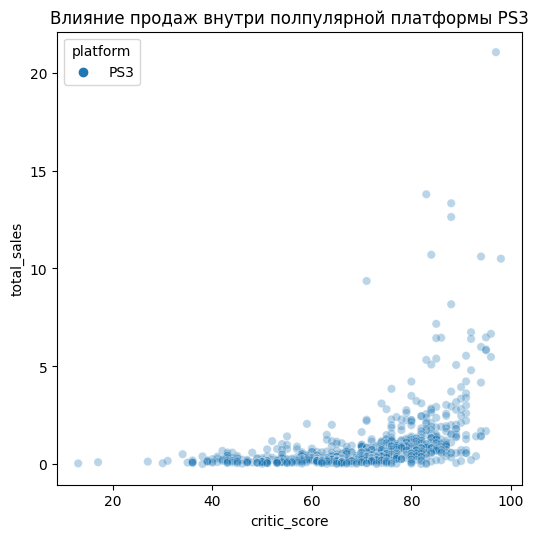

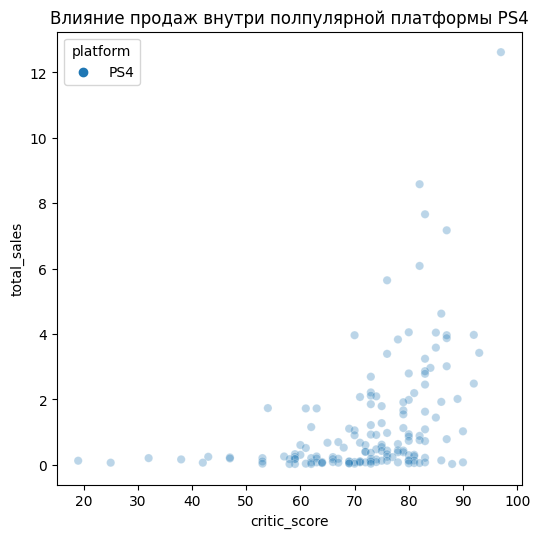

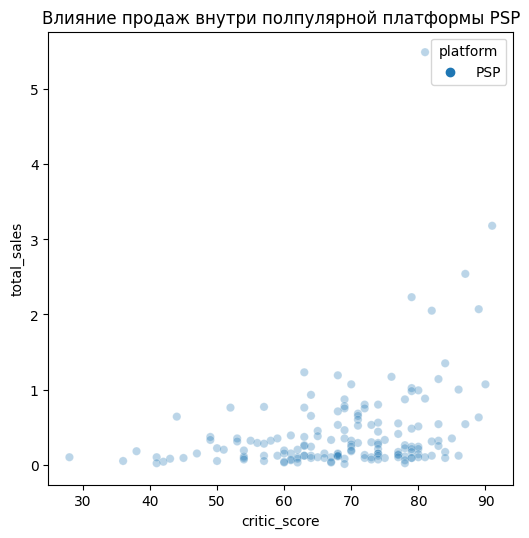

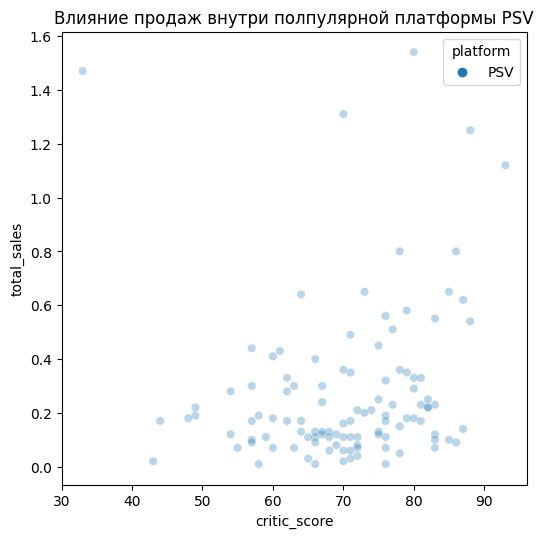

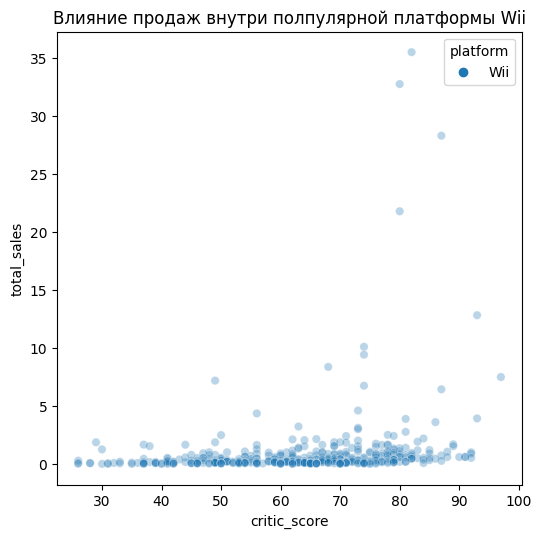

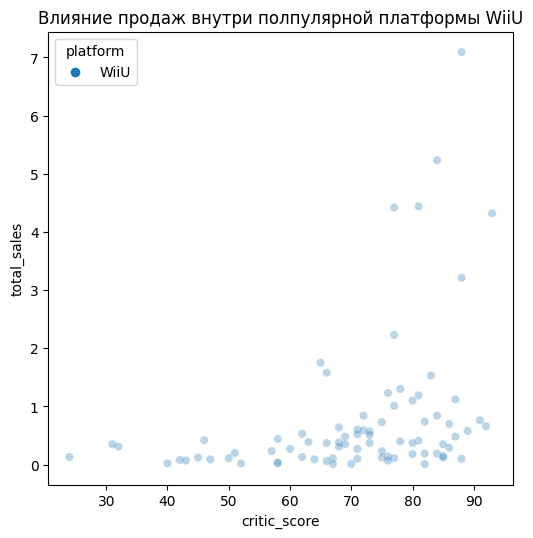

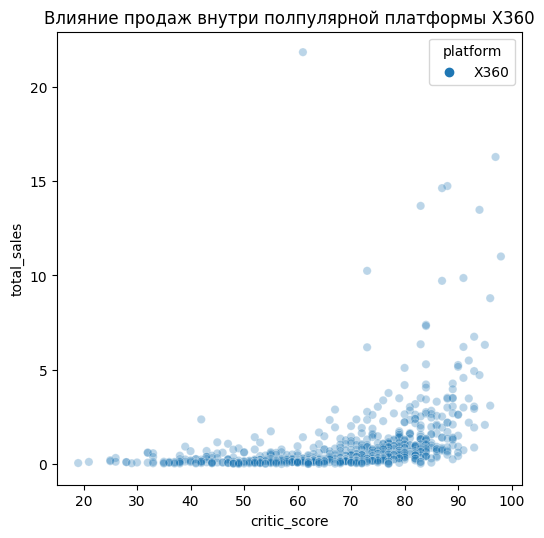

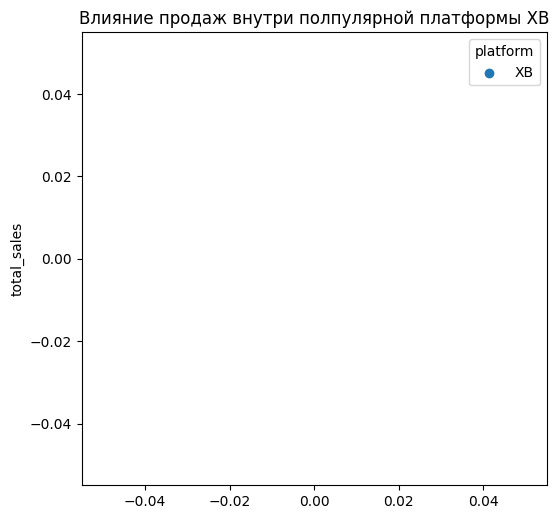

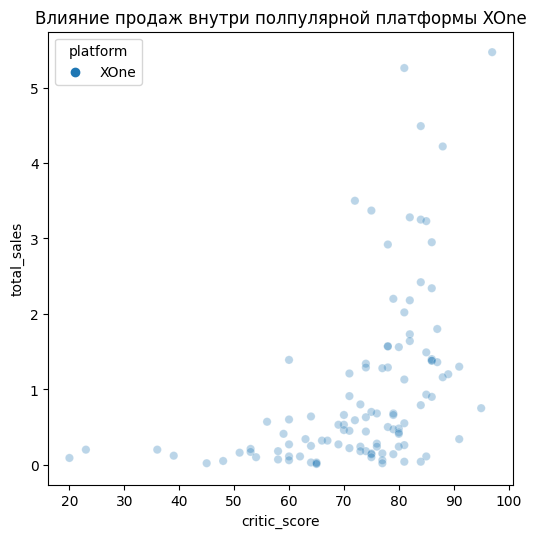

In [110]:
for group_name,group_data in data_correct.groupby('platform'): 
    plt.figure(figsize=(6, 6), dpi=100)
    plt.xlim=(10,100)
    plt.ylim=(0,7)
    sns.scatterplot(data=data_correct[data_correct['platform']==group_name],
                                      x='critic_score',
                                      y='total_sales',
                                      hue='platform', 
                                      alpha=0.3,
                                      legend='full').set(title=f'Влияние продаж внутри полпулярной платформы {group_name}')

    plt.show()


In [73]:
data_correct.pivot_table(index='total_sales',values=['critic_score']).corr()

,critic_score
critic_score,1.0


По остальным платформам аналогично наблюдается прямая зависимость продаж от оценок критиков

## Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

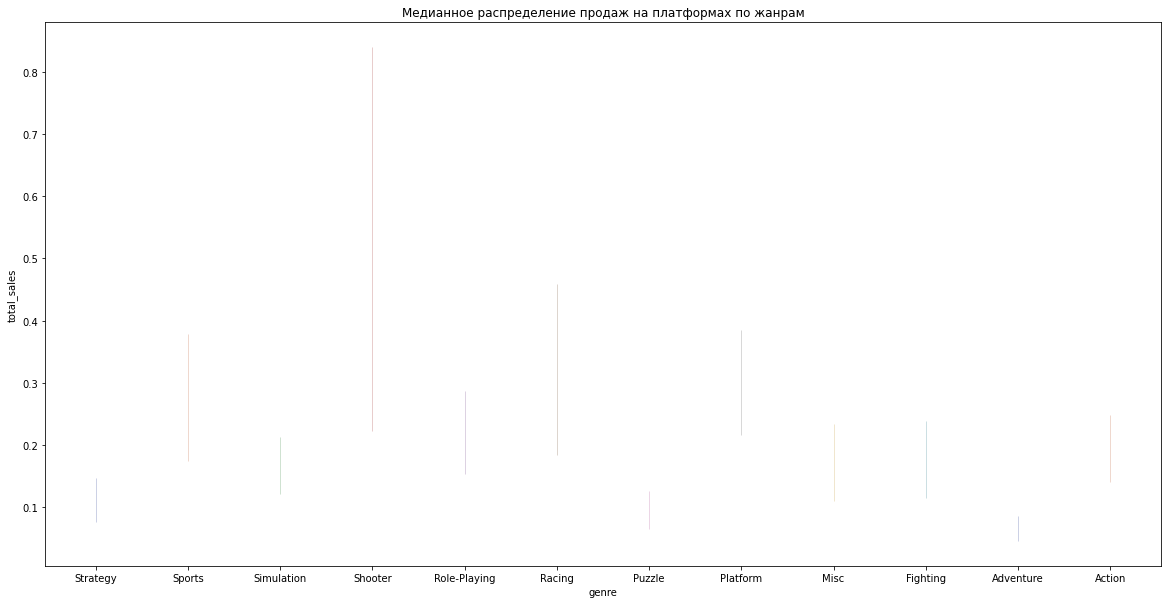

In [116]:
fig,ax=plt.subplots(figsize=(20,10))
ax=sns.lineplot(
    data =(data_correct
             .pivot_table(index=['platform','genre'],values='total_sales',aggfunc='median')
             .sort_values('genre',ascending=False)),
            y='total_sales',
            x='genre',
            hue='genre',palette='dark',
            legend=False).set(title='Медианное распределение продаж на платформах по жанрам')

In [117]:
data_correct.pivot_table(index='genre',values=['total_sales'],aggfunc='median').sort_values('total_sales',ascending=False)

,total_sales
genre,
Shooter,0.340
Platform,0.260
Sports,0.205
Fighting,0.190
Action,0.180
Racing,0.180
Role-Playing,0.160
Misc,0.150
Simulation,0.130


Исходя из полученных данных возможно обратить особое внимание на жанры Platform и Shooter и Sports как на самые популярные.

# Шаг 4. Составьте портрет пользователя каждого региона

## Определим для пользователя каждого региона (NA, EU, JP) 

### Cамые популярные платформы (топ-5). Опишите различия в долях продаж.

In [76]:
#создадим сводную таблицу по na_sales
data_na_agg = (data_correct
                .pivot_table(index='platform',
                            values=['na_sales'],
                            aggfunc='sum')
                .sort_values('na_sales',ascending=False)
                ).head()
data_na_agg

,na_sales
platform,
X360,490.00
PS3,348.46
Wii,332.81
DS,198.73
PS4,87.25


In [77]:
#создадим объединенную "Другие" группу для платформ невошедших в топ 5
data_na_agg.loc['Другие','na_sales'] = (data_correct
                .pivot_table(index='platform',
                            values=['na_sales'],
                            aggfunc='sum')
                .sort_values('na_sales',ascending=False).iloc[5:].sum()[0])

In [78]:
#создадим сводную таблицу по eu_sales
data_eu_agg = (data_correct
                .pivot_table(index='platform',
                            values=['eu_sales'],
                            aggfunc='sum')
                .sort_values('eu_sales',ascending=False)
                ).head()
data_eu_agg

,eu_sales
platform,
PS3,292.47
X360,234.17
Wii,170.63
PS4,109.31
PC,88.64


In [79]:
#создадим объединенную "Другие" группу для платформ невошедших в топ 5
data_eu_agg.loc['Другие','eu_sales'] = (data_correct
                .pivot_table(index='platform',
                            values=['eu_sales'],
                            aggfunc='sum')
                .sort_values('eu_sales',ascending=False).iloc[5:].sum()[0])
data_eu_agg

,eu_sales
platform,
PS3,292.47
X360,234.17
Wii,170.63
PS4,109.31
PC,88.64
Другие,263.85


In [80]:
#создадим сводную таблицу по jp_sales
data_jp_agg = (data_correct
                .pivot_table(index='platform',
                            values=['jp_sales'],
                            aggfunc='sum')
                .sort_values('jp_sales',ascending=False)
                ).head()
data_jp_agg

,jp_sales
platform,
3DS,92.59
DS,76.12
PS3,72.81
PSP,60.46
Wii,47.01


In [81]:
#создадим объединенную "Другие" группу для платформ невошедших в топ 5
data_jp_agg.loc['Другие','jp_sales'] = (data_correct
                .pivot_table(index='platform',
                            values=['jp_sales'],
                            aggfunc='sum')
                .sort_values('jp_sales',ascending=False).iloc[5:].sum()[0])
data_jp_agg

,jp_sales
platform,
3DS,92.59
DS,76.12
PS3,72.81
PSP,60.46
Wii,47.01
Другие,58.98


Text(0.5, 1.0, 'Топ 5 Самых популярных платформ в Японии')

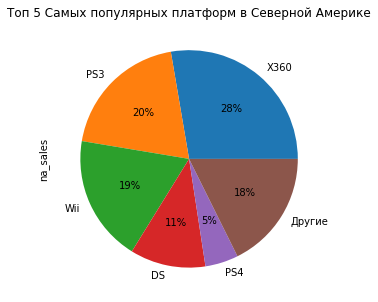

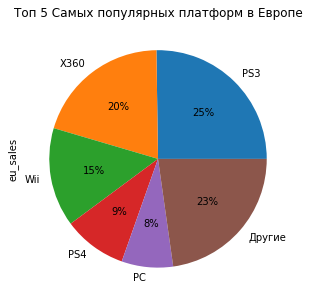

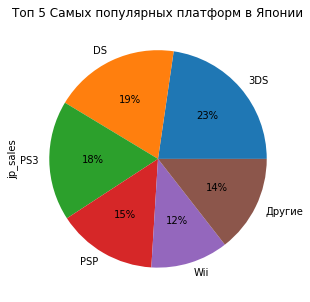

In [82]:
data_na_agg.plot(kind='pie', y='na_sales', legend=False,figsize=(12,5), autopct= '%.0f%%' )
plt.title('Топ 5 Самых популярных платформ в Северной Америке' )
data_eu_agg.plot(kind='pie', y='eu_sales', legend=False,figsize=(12,5), autopct= '%.0f%%' )
plt.title('Топ 5 Самых популярных платформ в Европе' )
data_jp_agg.plot(kind='pie', y='jp_sales', legend=False,figsize=(12,5), autopct= '%.0f%%' )
plt.title('Топ 5 Самых популярных платформ в Японии' )


Портрет покупателя каждого региона:  

Северная Америка: Большую часть продаж занимают PS3, X360, Wii, PS4,DS. На них стоит сделать основные усилия по продвижению продаж в Северной Америке.  

Европа:   
Большую часть продаж занимают PS3, X360, Wii, PS4, PC.На них стоит сделать основные усилия по продвижению продаж в Европе.  

Япония:   
Рынок самый небольшой. Здесь можно выделить 3DS, DS,PS3, PSP, Wii как самые прибыльные сегменты  

### Самые популярные жанры (топ-5). Поясните разницу.

In [83]:
#создадим сводную таблицу по na_sales
data_na_genre = (data_correct
                .pivot_table(index='genre',
                            values=['na_sales'],
                            aggfunc='sum')
                .sort_values('na_sales',ascending=False)
                ).head()
data_na_genre

,na_sales
genre,
Action,424.45
Shooter,295.02
Sports,268.73
Misc,210.85
Role-Playing,149.92


In [84]:
#создадим объединенную "Другие" группу для жанров не вошедших в топ 5
data_na_genre.loc['Другие','na_sales'] = (data_correct
                .pivot_table(index='genre',
                            values=['na_sales'],
                            aggfunc='sum')
                .sort_values('na_sales',ascending=False).iloc[5:].sum()[0])

In [85]:
#создадим сводную таблицу по eu_sales
data_eu_genre = (data_correct
                .pivot_table(index='genre',
                            values=['eu_sales'],
                            aggfunc='sum')
                .sort_values('eu_sales',ascending=False)
                ).head()
data_eu_genre

,eu_sales
genre,
Action,299.91
Shooter,192.45
Sports,173.18
Misc,106.34
Role-Playing,90.18


In [86]:
#создадим объединенную "Другие" группу для жанров не вошедших в топ 5
data_eu_genre.loc['Другие','eu_sales'] = (data_correct
                .pivot_table(index='genre',
                            values=['eu_sales'],
                            aggfunc='sum')
                .sort_values('eu_sales',ascending=False).iloc[5:].sum()[0])
data_eu_genre

,eu_sales
genre,
Action,299.91
Shooter,192.45
Sports,173.18
Misc,106.34
Role-Playing,90.18
Другие,297.01


In [87]:
#создадим сводную таблицу по jp_sales
data_jp_genre = (data_correct
                .pivot_table(index='genre',
                            values=['jp_sales'],
                            aggfunc='sum')
                .sort_values('jp_sales',ascending=False)
                ).head()
data_jp_genre

,jp_sales
genre,
Role-Playing,131.51
Action,83.09
Misc,36.29
Sports,29.77
Platform,22.90


In [88]:
#создадим объединенную "Другие" группу для жанров невошедших в топ 5
data_jp_genre.loc['Другие','jp_sales'] = (data_correct
                .pivot_table(index='genre',
                            values=['jp_sales'],
                            aggfunc='sum')
                .sort_values('jp_sales',ascending=False).iloc[5:].sum()[0])
data_jp_genre

,jp_sales
genre,
Role-Playing,131.51
Action,83.09
Misc,36.29
Sports,29.77
Platform,22.90
Другие,104.41


Text(0.5, 1.0, 'Топ 5 Самых популярных жанров в Японии')

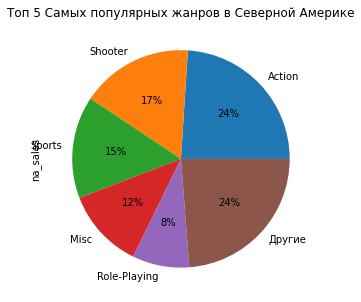

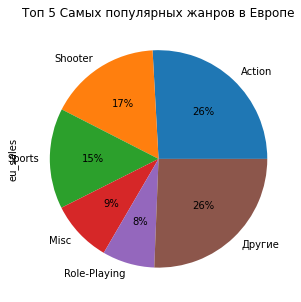

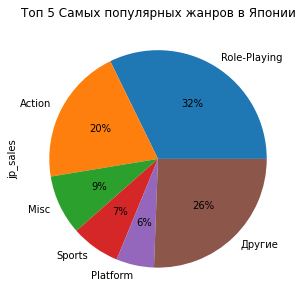

In [89]:
data_na_genre.plot(kind='pie', y='na_sales', legend=False,figsize=(12,5), autopct= '%.0f%%' )
plt.title('Топ 5 Самых популярных жанров в Северной Америке' )
data_eu_genre.plot(kind='pie', y='eu_sales', legend=False,figsize=(12,5), autopct= '%.0f%%' )
plt.title('Топ 5 Самых популярных жанров в Европе' )
data_jp_genre.plot(kind='pie', y='jp_sales', legend=False,figsize=(12,5), autopct= '%.0f%%' )
plt.title('Топ 5 Самых популярных жанров в Японии' )


Самые популярные жанры для каждого региона:  

Северная Америка: Большую часть продаж занимают Action, Shooter, Sports, Music, Role Playing. На них стоит сделать основные усилия по продвижению продаж в Северной Америке.  

Европа:   
Аналогично Северной Америке, большую часть продаж занимают Action, Shooter, Sports, Music, Role Playing. На них стоит сделать основные усилия по продвижению продаж в Европе.  

Япония:   
Рынок самый небольшой. Здесь можно выделить Action, Platform, Sports, Music, Role Playing как самые прибыльные сегменты  

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [90]:
data_correct['rating'].unique()

array(['E', 'M', nan, 'T', 'E10+', 'EC', 'RP'], dtype=object)

In [91]:
data_correct['rating'].isna().sum()

2803

In [92]:
#заполним пропуски оценок категорией unrated

data_correct['rating'] = data_correct['rating'].fillna('unrated')

In [93]:
#создадим сводную таблицу по na_sales
data_na_esrb = (data_correct
                .pivot_table(index='rating',
                            values=['na_sales'],
                            aggfunc='sum')
                .sort_values('na_sales',ascending=False)
                ).head()
data_na_esrb

,na_sales
rating,
E,528.96
M,486.93
T,294.46
E10+,248.07
unrated,209.98


In [94]:
#создадим сводную таблицу по eu_sales
data_eu_esrb = (data_correct
                .pivot_table(index='rating',
                            values=['eu_sales'],
                            aggfunc='sum')
                .sort_values('eu_sales',ascending=False)
                ).head()
data_eu_esrb

,eu_sales
rating,
M,346.11
E,313.00
unrated,181.38
T,177.83
E10+,140.72


In [95]:
#создадим сводную таблицу по jp_sales
data_jp_esrb = (data_correct
                .pivot_table(index='rating',
                            values=['jp_sales'],
                            aggfunc='sum')
                .sort_values('jp_sales',ascending=False)
                )
data_jp_esrb

,jp_sales
rating,
unrated,206.28
E,76.10
T,62.24
M,38.13
E10+,25.22
EC,0.00
RP,0.00


In [96]:
# причинами 0 в графе jp_sales являются отсутствие продаж этих игр в японии 
df.query('rating in ("RP","EC")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4297,Nickelodeon Team Umizoomi,DS,2011,Action,0.42,0.00,0.0,0.03,NaN,NaN,EC,0.45
5034,Sesame Street: Elmo's A-to-Zoo Adventure,Wii,2010,Misc,0.35,0.00,0.0,0.02,NaN,NaN,EC,0.37
6046,Sesame Street: Cookie's Counting Carnival,Wii,2010,Misc,0.27,0.00,0.0,0.02,NaN,NaN,EC,0.29
6764,Dora the Explorer: Journey to the Purple Planet,PS2,2005,Adventure,0.12,0.09,0.0,0.03,NaN,7.0,EC,0.24
7586,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009,Misc,0.19,0.00,0.0,0.01,NaN,NaN,EC,0.20
9960,Dora the Explorer: Journey to the Purple Planet,GC,2005,Adventure,0.09,0.02,0.0,0.00,NaN,NaN,EC,0.11
13065,Sesame Street: Cookie's Counting Carnival,PC,2010,Misc,0.05,0.00,0.0,0.00,NaN,NaN,EC,0.05
13455,Sesame Street: Elmo's A-to-Zoo Adventure,PC,2010,Misc,0.04,0.00,0.0,0.00,NaN,NaN,EC,0.04
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.00,0.03,0.0,0.01,63.0,6.8,RP,0.04


In [97]:
df.query('rating in ("RP","EC")')['name'].count()

9

Причинами 0 в графе jp_sales являются отсутствие продаж этих игр в японии. Игр всего 9 и делать однозначные выводы будет некорректно. Исключим данные из дальнейшего расчета.

Text(0.5, 1.0, 'Рейтинг ESRB в Японии')

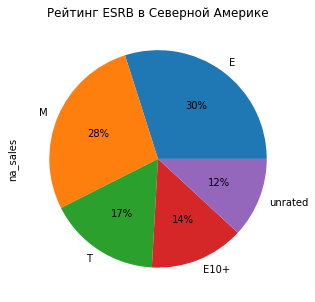

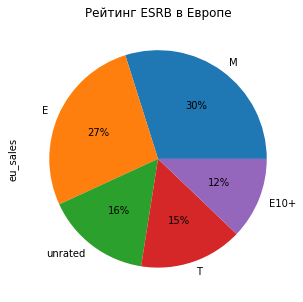

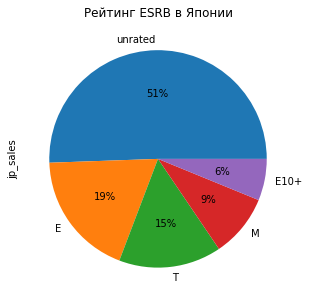

In [98]:
#построим графики

data_na_esrb.plot(kind='pie', y='na_sales', legend=False,figsize=(12,5), autopct= '%.0f%%' )
plt.title('Рейтинг ESRB в Северной Америке' )
data_eu_esrb.plot(kind='pie', y='eu_sales', legend=False,figsize=(12,5), autopct= '%.0f%%' )
plt.title('Рейтинг ESRB в Европе' )
data_jp_esrb.query('rating not in ("RP","EC")').plot(kind='pie', y='jp_sales', legend=False,figsize=(12,5), autopct= '%.0f%%' )
plt.title('Рейтинг ESRB в Японии' )

Влияние рейтинга ESRB для каждого региона:  

Северная Америка: Большую часть продаж занимают игры категории Е и М. На них стоит сделать основные усилия по продвижению продаж в Северной Америке.  

Европа:   
Аналогично Северной Америке, большую часть продаж занимают игры категории Е и М. На них стоит сделать основные усилия по продвижению продаж в Европе.  

Япония:   Большая часть данных по рейтингу находится в статусе unrated. Также стоит учесть, что игры категорий RP,EC не представленны в данной стране по выборке. По имеющимся данным остальную часть продаж занимают игры категории Т и Е.

# Шаг 5. Проверьте гипотезы

## Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [99]:
platform_xone = df.query('(platform == "XOne") & (user_score >=0) & (~user_score.isna())')
platform_pc = df.query('(platform == "PC") & (user_score >=0) & (~user_score.isna())')

In [100]:
results = st.ttest_ind(platform_xone['user_score'],platform_pc['user_score'],equal_var=False)

alpha = 0.05

print('p-значение:',results.pvalue)

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу') 
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


### Проверка гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные"

Нулевая гипотеза: Средние пользовательские рейтинги жанров  Action и Sports одинаковые  
Альтернативная гипотеза:    Средние пользовательские рейтинги жанров Action и Sports разные

In [101]:
genre_action = df.query('(genre == "Action") & (user_score >=0) & (~user_score.isna())')
genre_sports = df.query('(genre == "Sports") & (user_score >=0) & (~user_score.isna())')

In [102]:
results = st.ttest_ind(platform_xone['user_score'],platform_pc['user_score'],equal_var=False)

alpha = 0.05

print('p-значение:',results.pvalue)

if (results.pvalue < alpha): 
    print('Отвергаем нулевую гипотезу') 
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


# Шаг 6. Общий вывод

При подготовке данных было выявлено, что пропусков и ошибок возможно было избежать. Для того, чтобы в дальнейшем сразу иметь качественные исходные данные предлагается заранее проработать список строго обязательных полей и форматов для предварительного отбора исходной выборки. Также необходимо заранее заготовить шаблон, где название столбцов будут сразу с маленькой буквы.

Cогласно проведенному исследовательскому анализу подготовленных данных было выявлено, что :

1)актуальные платформы появляются через каждые 3-5 лет Cтарые платформы исчезают через 7 лет  
наблюдаем общий спад продаж в индустрии после 2011 года
2)самой перспективной платформой выглядит PS4 так как с момента старта продаж наблюдается стабильная ежегодная положительная динамика роста продаж игр.
3)При выборе игр стоит обратить внимание на оценки критиков такак прямая зависимость и выбирать игры с высоким рейтингом.
4)Стоит обратить особое внимание на жанры Action и Shooter и Sports как на самые прибыльные.
 
 
Портрет покупателя каждого региона:  

Северная Америка: Большую часть продаж занимают PS3, X360, Wii, PS4,DS. На них стоит сделать основные усилия по продвижению продаж в Северной Америке.

Европа:   
Большую часть продаж занимают PS3, X360, Wii, PS4, PC.На них стоит сделать основные усилия по продвижению продаж в Европе.

Япония:   
Рынок самый небольшой. Здесь можно выделить 3DS, DS,PS3, PSP, Wii как самые прибыльные сегменты   
 
Самые популярные жанры для каждого региона:

Северная Америка: Большую часть продаж занимают Action, Shooter, Sports, Music, Role Playing. На них стоит сделать основные усилия по продвижению продаж в Северной Америке.
Европа:
Аналогично Северной Америке, большую часть продаж занимают Action, Shooter, Sports, Music, Role Playing. На них стоит сделать основные усилия по продвижению продаж в Европе.
Япония:
Здесь можно выделить Action, Platform, Sports, Music, Role Playing как самые прибыльные сегменты 
 
Влияние рейтинга ESRB для каждого региона:

Северная Америка: Большую часть продаж занимают игры категории Е и М. На них стоит сделать основные усилия по продвижению продаж в Северной Америке.

Европа:
Аналогично Северной Америке, большую часть продаж занимают игры категории Е и М. На них стоит сделать основные усилия по продвижению продаж в Европе.

Япония: Большая часть данных по рейтингу находится в статусе unrated. Также стоит учесть, что игры категорий RP,EC не представленны в данной стране по выборке. По имеющимся данным остальную часть продаж занимают игры категории Т и Е.

Проверка гипотез показала, что Средние пользовательские рейтинги платформ Xbox One и PC разные, Средние пользовательские рейтинги жанров Action и Sports разные